## The purpose of this file
Detect the significant ties, or backbone, and save it in graphml format.

In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import networkx as nx
import toolbox as tb

In [2]:
tag = "anime"
hashtag = "アニメ"
timespan = "23-23"
tau = 86
G = nx.read_graphml(f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml')

In [3]:
hashtags = list(G.nodes())
ST = tb.STdetection(G, tau, f'../data/ML_estimate/{tag}/{timespan}_{tau}_krylov.npy')

In [4]:
ST.estimate.shape[0] == len(hashtags)
hashtags == ST.nodelist

True

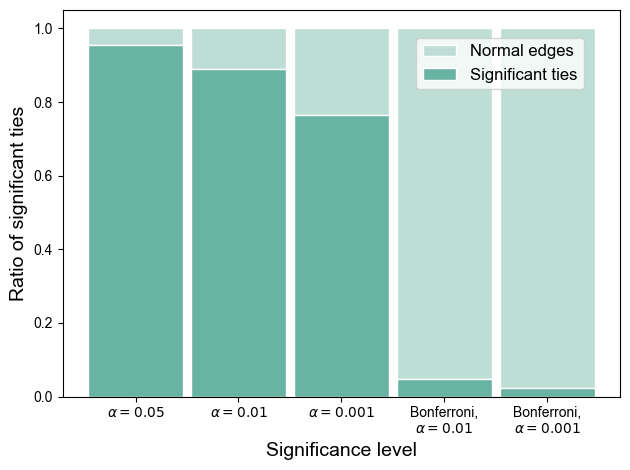

CPU times: total: 1min 15s
Wall time: 1min 17s


In [5]:
%%time
fname=f"../data/figure/ratioST/ratioST_{tag}_{timespan}_{tau}.pdf"
ST.show_ratio_ST(fname=fname)

In [6]:
%%time
fname = f'../data/graph_data/{tag}/backbone/{hashtag}_{timespan}_{tau}_backbone'
result = ST.turn_graph(fname=fname)

In [7]:
result

In [8]:
B001, B0001 = result[0], result[-1]

In [9]:
B001.number_of_nodes(), B001.number_of_edges()

(3275, 9990)

In [10]:
B0001.number_of_nodes(), B0001.number_of_edges()

(1649, 4734)

In [11]:
B0001.number_of_edges() / G.number_of_edges(), B0001.number_of_edges(), G.number_of_edges()

(0.023075910679554862, 4734, 205149)